# Energy consumption

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import helpers as h
from run_power_consumption import masked_ascon_traces, ascon_traces, aes_gcm_traces, none_traces, get_intervals
from matplotlib.ticker import MultipleLocator

In [2]:
method = "ascon"

encryption_methods = {
    "ascon": (ascon_traces, "ascon1-6:8-12"),
    "none": (none_traces, "none1-11"),
    "aes-cgm": (aes_gcm_traces, "aes-gcm1-12"),
    "masked-ascon": (masked_ascon_traces, "masked_ascon2-7:9-12")
}


fs = 4000

In [3]:
# ASCON
path = os.path.join(".." ,"results", "energy_consumption" ,encryption_methods[method][1], "Main power - Arc.csv")
orig_df = h.read_data(path)

In [4]:
# path2 = os.path.join("..", "results", "energy_consumption", "masked_ascon1_and_8", "Main energy - Arc.csv")
# df1_8 = h.read_data(path2)


### Separate power traces

In [5]:
dfs = encryption_methods[method][0](orig_df)
# h.plot_scenarios(dfs, ylim= None)

In [ ]:
smooth_s   = 0.03
thresh = 0.120
min_gap_s   = 0.5

segmented = h.fast_segment(df=dfs[3],
                           value_col='Value',
                           fs=fs,
                           smooth_s=smooth_s,
                           thresh=thresh,
                           min_gap_s=min_gap_s)
segmented["Timestamp"] = segmented.index / fs
segmented["Value"] = segmented["Value"]*1e3
# h.plot_segmented(segmented, fs=fs, ylim=(0.1, 0.23))

In [7]:
#plot a 4s segment
start = 0
end = 4
seq = 50

# fig, ax = h.plot_segmented(
#     segmented,
#     fs=fs,
#     ylim=(100, 220),
#     xlim=(seq * 60 +0.3, seq * 60 + 0.8)
# )

# ax.set_title("Power Usage breakdown")
# ax.xaxis.set_major_locator(MultipleLocator(0.1))
# plt.show()

In [8]:
# def calulate_energy(segmented):
#     segmented["energy[uJ]"] = segmented["Value"]/4000*1e6

# calulate_energy(segmented)
# segmented


In [9]:
# table = h.summarize_high_intervals(segmented, value_col="energy[uJ]")

In [10]:
# table

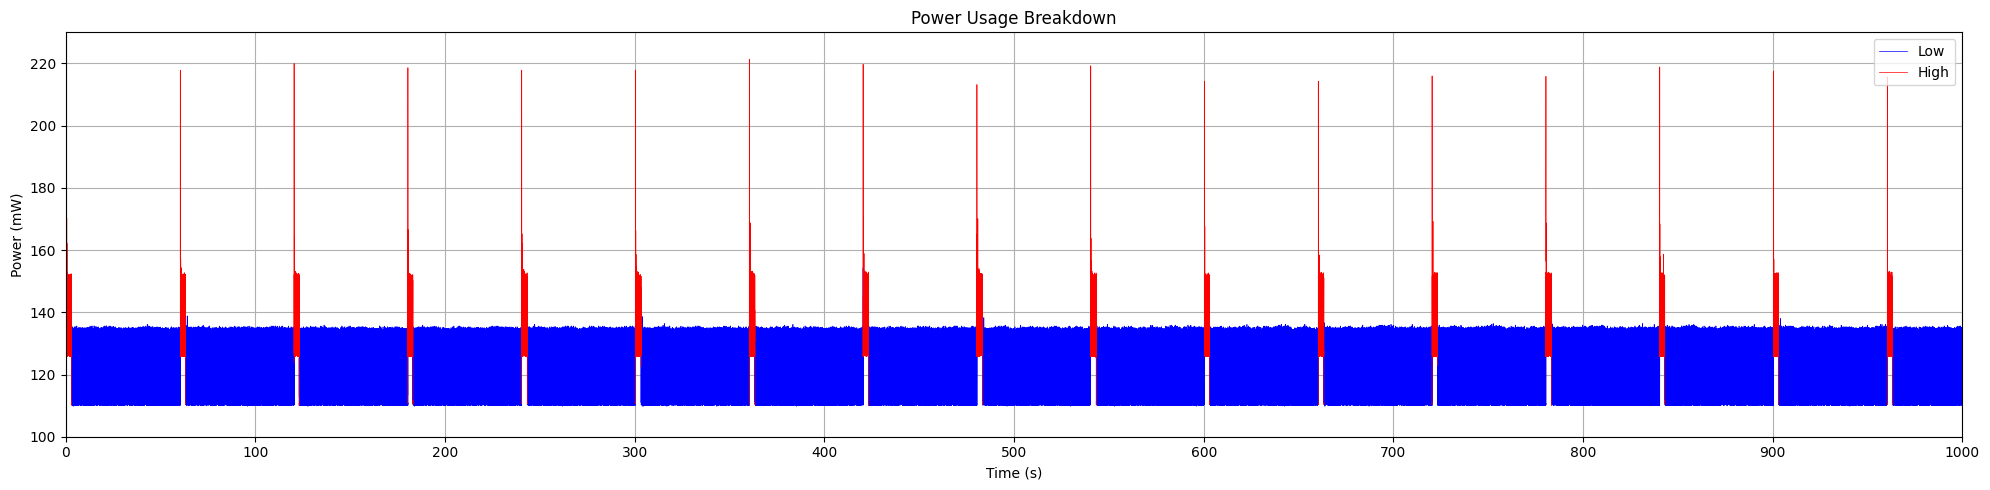

In [ ]:
fig, ax = h.plot_segmented(segmented,
                       fs=fs,
                       ylim=(100, 230),
                       xlim=(0, 100),
                       downsample=4)

ax.xaxis.set_major_locator(MultipleLocator(100))
# plt.show()

In [ ]:
# save the figure
fig.savefig(os.path.join("..", "figures", "power_consumption", "Ascon_scen4.png"),
            dpi=300,
            bbox_inches='tight')